In [2]:
import numpy as np
import cv2
import tensorflow as tf
import os
from tqdm import tqdm
from random import shuffle
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression

In [3]:
train_cats = '/home/zafar/Convolution/Convolutional_Neural_Networks/dataset/training_set/cats'
train_dogs = '/home/zafar/Convolution/Convolutional_Neural_Networks/dataset/training_set/dogs'
test_dogs  = '/home/zafar/Convolution/Convolutional_Neural_Networks/dataset/test_set/dogs'
test_cats  = '/home/zafar/Convolution/Convolutional_Neural_Networks/dataset/test_set/cats'
IMG_SIZE   = 50

In [4]:
def create_training_data(IMG_SIZE):
    training_data = []
    #for cats
    for img in tqdm(os.listdir(train_cats)):
        path = os.path.join(train_cats,img)
        img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
            label = [1,0]
            training_data.append([np.array(img),np.array(label,dtype = 'float')])
#     for dogs
    for img in tqdm(os.listdir(train_dogs)):
        path = os.path.join(train_dogs,img)
        img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        if img is not None:
            label = [0,1]
            img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
            training_data.append([np.array(img),np.array(label,dtype = 'float')])
#     training_data = np.array(training_data)
    shuffle(training_data)
    np.save('training_data.npy',training_data)
    return training_data

In [5]:
def create_testing_data(IMG_SIZE):
    testing_data = []
    #for cats
    for img in tqdm(os.listdir(test_cats)):
        num = img.split('.')[1]
        path = os.path.join(test_cats,img)
        img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
            testing_data.append([np.array(img),num])
#     for dogs
    for img in tqdm(os.listdir(test_dogs)):
        num = img.split('.')[1]
        path = os.path.join(test_dogs,img)
        img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
            testing_data.append([np.array(img),num])
    shuffle(testing_data)
#     saving the file
    np.save('testing_data.npy',testing_data)
    return testing_data

In [6]:
# train = create_training_data(IMG_SIZE)
train  = np.load('training_data.npy')

100%|██████████| 4001/4001 [00:02<00:00, 1371.10it/s]


In [7]:
X = np.array([i[0] for i in train]).reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [8]:
Y = np.array([i[1] for i in train])

In [9]:
test  = create_testing_data(IMG_SIZE)
# test  = np.load('testing_data.npy')

100%|██████████| 1001/1001 [00:00<00:00, 1309.97it/s]


In [10]:
test_x = np.array([i[0] for i in test]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
test_y = np.array([i[1] for i in test])
print(test_x.shape)
print(test_y.shape)

(2000, 50, 50, 1)
(2000,)


In [11]:
#Building the Model


import tensorflow as tf
tf.reset_default_graph()

convnet = input_data(shape=[None, IMG_SIZE, IMG_SIZE, 1], name='input')

convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 128, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.8)

convnet = fully_connected(convnet, 2, activation='softmax')
convnet = regression(convnet, optimizer='adam', learning_rate=0.001, loss='categorical_crossentropy', name='targets')

model = tflearn.DNN(convnet, tensorboard_dir='log')


Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [12]:
#Fitting the model
model.fit({'input': X}, {'targets': Y}, n_epoch=10, show_metric=True)

Training Step: 1249  | total loss: 0.21039 | time: 16.571s
| Adam | epoch: 010 | loss: 0.21039 - acc: 0.9072 -- iter: 7936/8000
Training Step: 1250  | total loss: 0.21628 | time: 16.705s
| Adam | epoch: 010 | loss: 0.21628 - acc: 0.9087 -- iter: 8000/8000
--


[0.88905233 0.11094771]
[0.50270396 0.49729607]
[0.9349859  0.06501413]
[0.44845006 0.55155   ]
[0.6258496 0.3741504]
[0.09054781 0.9094522 ]
[0.89192194 0.10807803]
[0.8354061  0.16459389]
[0.99561226 0.00438776]
[0.91258895 0.08741103]


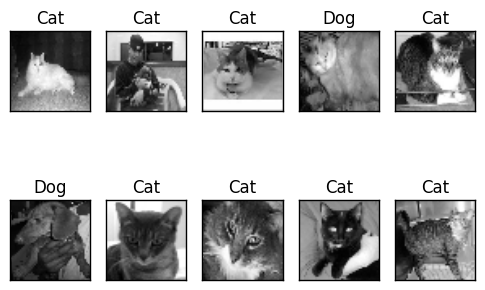

In [13]:
import matplotlib.pyplot as plt

test_data = np.load('testing_data.npy')

fig=plt.figure()

for num,data in enumerate(test_data[10:20]):
    # cat: [1,0]
    # dog: [0,1]
    img_data = data[0]
    img_num = data[1]
    
    y = fig.add_subplot(2,5,num+1)
    orig = img_data
    data = img_data.reshape(IMG_SIZE,IMG_SIZE,1)
    #model_out = model.predict([data])[0]
#     two-output --->>>[CAT,DOG]
    model_out = model.predict([data])[0]
    print(model_out)
    if np.argmax(model_out) == 1: str_label='Dog'
    else: str_label='Cat'
        
    y.imshow(orig,cmap='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
plt.show()

In [137]:
#function to determine cats/dogs
def here(path):
    check = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
    if check is not None:
        check = cv2.resize(check,(IMG_SIZE,IMG_SIZE))
        check = np.array([check])
        x = np.append(np.array([]),check) 
        x = x.reshape(50,50,1)
        model_out = model.predict([x])[0]
        if np.argmax(model_out)==0:
            print("Its a Cat")
        else:
            print('Its a Dog')

In [121]:
#directory of cats
path = '/home/zafar/Convolution/Convolutional_Neural_Networks/dataset/test_set/cats'

In [138]:
for img in tqdm(os.listdir(path)):
    path1 = os.path.join(path,img)
    here(path1)

  7%|▋         | 69/1001 [00:00<00:02, 328.36it/s]

Its a Cat
Its a Cat
Its a Dog
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Dog
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Dog
Its a Dog
Its a Cat
Its a Cat
Its a Dog
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Dog
Its a Cat
Its a Cat
Its a Cat
Its a Dog
Its a Cat
Its a Dog
Its a Cat
Its a Cat
Its a Dog
Its a Cat
Its a Cat
Its a Cat
Its a Dog
Its a Cat
Its a Cat
Its a Dog
Its a Dog
Its a Cat
Its a Cat
Its a Cat
Its a Dog
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat


 14%|█▍        | 144/1001 [00:00<00:02, 349.23it/s]

Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Dog
Its a Cat
Its a Dog
Its a Cat
Its a Cat
Its a Dog
Its a Cat
Its a Cat
Its a Dog
Its a Cat
Its a Cat
Its a Dog
Its a Cat
Its a Cat
Its a Cat
Its a Dog
Its a Dog
Its a Cat
Its a Cat
Its a Dog
Its a Cat
Its a Cat
Its a Cat
Its a Dog
Its a Cat
Its a Cat
Its a Cat
Its a Dog
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Dog
Its a Cat
Its a Cat
Its a Cat
Its a Dog
Its a Cat
Its a Cat
Its a Dog
Its a Cat
Its a Dog
Its a Dog
Its a Cat
Its a Dog
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Dog
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Dog
Its a Dog
Its a Cat
Its a Cat
Its a Dog
Its a Dog
Its a Cat
Its a Cat
Its a Cat
Its a Dog


 22%|██▏       | 217/1001 [00:00<00:02, 354.29it/s]

Its a Cat
Its a Dog
Its a Cat
Its a Cat
Its a Dog
Its a Cat
Its a Cat
Its a Dog
Its a Cat
Its a Dog
Its a Cat
Its a Cat
Its a Cat
Its a Dog
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Dog
Its a Cat
Its a Dog
Its a Cat
Its a Cat
Its a Dog
Its a Cat
Its a Cat
Its a Dog
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Dog
Its a Dog
Its a Dog
Its a Cat
Its a Cat
Its a Dog
Its a Cat
Its a Dog
Its a Dog
Its a Cat
Its a Cat
Its a Cat
Its a Dog
Its a Cat
Its a Cat
Its a Dog
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Dog
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Dog
Its a Dog
Its a Cat
Its a Cat
Its a Dog
Its a Cat
Its a Cat
Its a Cat
Its a Cat


 29%|██▉       | 293/1001 [00:00<00:01, 365.22it/s]

Its a Dog
Its a Cat
Its a Dog
Its a Cat
Its a Cat
Its a Cat
Its a Dog
Its a Cat
Its a Cat
Its a Cat
Its a Dog
Its a Cat
Its a Cat
Its a Cat
Its a Dog
Its a Cat
Its a Cat
Its a Dog
Its a Cat
Its a Cat
Its a Cat
Its a Dog
Its a Dog
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Dog
Its a Dog
Its a Cat
Its a Dog
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Dog
Its a Cat
Its a Dog
Its a Cat
Its a Dog
Its a Cat
Its a Dog
Its a Dog
Its a Cat
Its a Dog
Its a Dog
Its a Dog
Its a Cat
Its a Cat
Its a Cat
Its a Dog
Its a Dog
Its a Cat
Its a Cat
Its a Cat
Its a Dog
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Dog
Its a Dog
Its a Dog
Its a Dog
Its a Cat
Its a Dog
Its a Dog
Its a Dog
Its a Dog


 36%|███▋      | 365/1001 [00:01<00:01, 358.24it/s]

Its a Cat
Its a Dog
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Dog
Its a Dog
Its a Cat
Its a Dog
Its a Dog
Its a Cat
Its a Cat
Its a Dog
Its a Cat
Its a Cat
Its a Cat
Its a Dog
Its a Cat
Its a Cat
Its a Cat
Its a Dog
Its a Dog
Its a Dog
Its a Cat
Its a Dog
Its a Cat
Its a Cat
Its a Dog
Its a Cat
Its a Dog
Its a Dog
Its a Cat
Its a Dog
Its a Cat
Its a Cat
Its a Dog
Its a Cat
Its a Dog
Its a Dog
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Dog
Its a Dog
Its a Dog
Its a Cat
Its a Cat
Its a Cat
Its a Dog
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Dog
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Dog
Its a Dog
Its a Cat
Its a Dog
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Dog
Its a Dog


 40%|███▉      | 400/1001 [00:01<00:01, 341.13it/s]

Its a Dog
Its a Cat
Its a Cat
Its a Dog
Its a Cat
Its a Cat
Its a Cat
Its a Dog
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Dog
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Dog
Its a Dog
Its a Cat
Its a Cat
Its a Dog
Its a Cat
Its a Dog
Its a Cat
Its a Cat
Its a Cat
Its a Dog
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Dog
Its a Dog
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Dog
Its a Dog
Its a Dog
Its a Cat
Its a Cat
Its a Cat
Its a Dog
Its a Dog
Its a Dog
Its a Dog
Its a Cat
Its a Cat
Its a Dog
Its a Cat
Its a Dog
Its a Cat
Its a Cat
Its a Dog


 47%|████▋     | 469/1001 [00:01<00:01, 338.56it/s]

Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Dog
Its a Dog
Its a Cat
Its a Dog
Its a Dog
Its a Cat
Its a Dog
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Dog
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Dog
Its a Cat
Its a Cat
Its a Cat
Its a Dog
Its a Dog
Its a Dog
Its a Dog
Its a Cat
Its a Dog
Its a Dog
Its a Cat
Its a Cat
Its a Dog
Its a Cat
Its a Dog
Its a Cat
Its a Dog
Its a Dog
Its a Cat
Its a Dog
Its a Cat
Its a Cat
Its a Dog
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Dog
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Dog
Its a Dog
Its a Cat
Its a Cat
Its a Cat
Its a Dog
Its a Cat
Its a Cat
Its a Cat
Its a Dog
Its a Dog
Its a Cat
Its a Dog


 54%|█████▍    | 541/1001 [00:01<00:01, 345.91it/s]

Its a Dog
Its a Dog
Its a Cat
Its a Dog
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Dog
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Dog
Its a Dog
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Dog
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Dog
Its a Cat
Its a Cat
Its a Cat
Its a Dog
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Dog
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Dog
Its a Dog
Its a Dog
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Dog
Its a Cat
Its a Dog
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Dog
Its a Dog


 61%|██████▏   | 614/1001 [00:01<00:01, 352.37it/s]

Its a Cat
Its a Cat
Its a Cat
Its a Dog
Its a Dog
Its a Dog
Its a Cat
Its a Dog
Its a Cat
Its a Dog
Its a Cat
Its a Cat
Its a Cat
Its a Dog
Its a Dog
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Dog
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Dog
Its a Dog
Its a Cat
Its a Cat
Its a Cat
Its a Dog
Its a Cat
Its a Dog
Its a Cat
Its a Dog
Its a Cat
Its a Cat
Its a Dog
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Dog
Its a Dog
Its a Dog
Its a Cat
Its a Cat
Its a Dog
Its a Cat
Its a Dog
Its a Dog
Its a Cat
Its a Cat
Its a Dog
Its a Cat
Its a Cat
Its a Dog
Its a Dog
Its a Dog
Its a Cat
Its a Cat
Its a Cat
Its a Dog
Its a Cat
Its a Dog
Its a Cat
Its a Dog
Its a Dog
Its a Dog
Its a Cat
Its a Dog
Its a Cat


 69%|██████▉   | 690/1001 [00:01<00:00, 359.62it/s]

Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Dog
Its a Dog
Its a Dog
Its a Cat
Its a Dog
Its a Dog
Its a Cat
Its a Dog
Its a Cat
Its a Cat
Its a Cat
Its a Dog
Its a Cat
Its a Cat
Its a Dog
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Dog
Its a Dog
Its a Dog
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Dog
Its a Dog
Its a Dog
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Dog
Its a Dog
Its a Dog
Its a Cat
Its a Cat
Its a Dog
Its a Cat
Its a Dog
Its a Dog
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Dog
Its a Cat
Its a Cat
Its a Cat
Its a Dog
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat


 76%|███████▌  | 762/1001 [00:02<00:00, 339.19it/s]

Its a Cat
Its a Cat
Its a Dog
Its a Dog
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Dog
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Dog
Its a Cat
Its a Dog
Its a Dog
Its a Dog
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Dog
Its a Dog
Its a Cat
Its a Dog
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Dog
Its a Cat
Its a Dog
Its a Dog
Its a Cat
Its a Dog
Its a Cat
Its a Cat
Its a Cat
Its a Dog
Its a Cat
Its a Cat
Its a Cat
Its a Dog
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Dog
Its a Cat
Its a Cat
Its a Cat
Its a Dog
Its a Cat
Its a Cat


 83%|████████▎ | 831/1001 [00:02<00:00, 329.82it/s]

Its a Dog
Its a Dog
Its a Dog
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Dog
Its a Cat
Its a Dog
Its a Dog
Its a Dog
Its a Cat
Its a Dog
Its a Dog
Its a Cat
Its a Cat
Its a Dog
Its a Cat
Its a Cat
Its a Dog
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Dog
Its a Dog
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Dog
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Dog
Its a Dog
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Dog
Its a Cat
Its a Cat
Its a Cat
Its a Dog
Its a Cat
Its a Dog
Its a Dog
Its a Dog
Its a Cat
Its a Cat
Its a Cat


 90%|█████████ | 901/1001 [00:02<00:00, 337.96it/s]

Its a Dog
Its a Cat
Its a Cat
Its a Dog
Its a Cat
Its a Cat
Its a Cat
Its a Dog
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Dog
Its a Dog
Its a Dog
Its a Cat
Its a Dog
Its a Dog
Its a Cat
Its a Dog
Its a Dog
Its a Dog
Its a Cat
Its a Cat
Its a Dog
Its a Dog
Its a Dog
Its a Cat
Its a Dog
Its a Dog
Its a Cat
Its a Cat
Its a Dog
Its a Cat
Its a Cat
Its a Dog
Its a Dog
Its a Cat
Its a Cat
Its a Dog
Its a Dog
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Dog
Its a Cat
Its a Cat
Its a Dog
Its a Dog
Its a Dog
Its a Dog
Its a Dog
Its a Cat
Its a Dog
Its a Cat
Its a Cat
Its a Dog
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Dog
Its a Cat
Its a Dog


 97%|█████████▋| 975/1001 [00:02<00:00, 351.97it/s]

Its a Cat
Its a Cat
Its a Cat
Its a Dog
Its a Dog
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Dog
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Dog
Its a Dog
Its a Dog
Its a Cat
Its a Dog
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Dog
Its a Cat
Its a Cat
Its a Dog
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Dog
Its a Cat
Its a Dog
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Dog
Its a Cat
Its a Dog
Its a Dog
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Dog
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Dog
Its a Cat
Its a Dog
Its a Cat
Its a Cat
Its a Dog
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat


100%|██████████| 1001/1001 [00:02<00:00, 349.02it/s]

Its a Dog
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Cat
Its a Dog
Its a Cat
Its a Dog


# Error Rate - 32.1%(test_set)